In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
import numpy as np

def load_json(file_path):
    """Load JSON file."""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

def extract_lengths(data):
    """Extract lengths of gold_ctx strings that don't start with '<P>'."""
    lengths = []
    for item in data:
        gold_ctx = item.get("gold_ctx", "")
        if not gold_ctx.startswith("<P>"):
            lengths.append(len(gold_ctx))
        # if gold_ctx.startswith("<P>"):
        #     lengths.append(len(gold_ctx))
        # lengths.append(len(gold_ctx))
    return lengths

def calculate_statistics(lengths):
    """Calculate and print the average length and variance of gold_ctx."""
    average_length = np.mean(lengths) if lengths else 0
    variance = np.var(lengths) if lengths else 0
    max_length = max(lengths) if lengths else 0
    min_length = min(lengths) if lengths else 0
    percentile_99 = np.percentile(lengths, 99) if lengths else 0
    percentile_95 = np.percentile(lengths, 95) if lengths else 0
    percentile_90 = np.percentile(lengths, 90) if lengths else 0
    print(f"90th percentile of gold_ctx length: {percentile_90:.2f}")
    print(f"95th percentile of gold_ctx length: {percentile_95:.2f}")
    print(f"99th percentile of gold_ctx length: {percentile_99:.2f}")
    print(f"Max gold_ctx length: {max_length}")
    print(f"Min gold_ctx length: {min_length}")
    print(f"Average gold_ctx length: {average_length:.2f}")
    print(f"Variance of gold_ctx length: {variance:.2f}")

def plot_density(lengths):
    """Plot density plot of lengths."""
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 5))
    sns.kdeplot(lengths, fill=True, color="blue", bw_adjust=0.5)
    plt.xlabel("Length of gold_ctx")
    plt.ylabel("Density")
    plt.title("Density Plot of gold_ctx Lengths")
    plt.show()

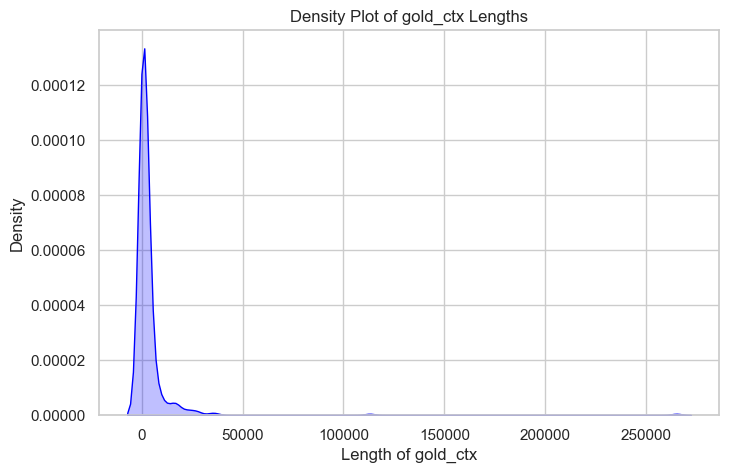

90th percentile of gold_ctx length: 6528.00
95th percentile of gold_ctx length: 14681.25
99th percentile of gold_ctx length: 29945.90
Max gold_ctx length: 265014
Min gold_ctx length: 27
Average gold_ctx length: 3540.89
Variance of gold_ctx length: 242034444.06


In [3]:
data = load_json("test_dataset_open_ended_new_nq.json")
lengths = extract_lengths(data)

if lengths:
    plot_density(lengths)
    calculate_statistics(lengths)
else:
    print("No valid gold_ctx found for plotting.")